In [24]:
# importing modules
import numpy as np 
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import random

In [53]:
num_pages = 10
iterations = 1000
dampening_factor = 0
matrixB = 1/(num_pages)*np.ones((num_pages, num_pages))

In [54]:
matrixB

array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]])

In [55]:
matrix = np.random.choice([0, 1], size=(num_pages, num_pages))
matrix[np.diag_indices_from(matrix)]=0
for i in range(num_pages):
    if matrix.transpose()[i].sum()==0:
        for j in range(num_pages):
            matrix[j][i]=1/(num_pages)
matrix

array([[0, 0, 0, 1, 0, 1, 1, 1, 0, 1],
       [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 1],
       [1, 1, 0, 0, 0, 1, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 1, 1],
       [1, 1, 1, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 1, 0]])

In [56]:
for i in range(len(matrix)):
    print(f"Page{i+1} has {(matrix[i].sum()).astype(int)} inlinks & {(matrix.transpose()[i].sum()).astype(int)} outlinks")

Page1 has 5 inlinks & 7 outlinks
Page2 has 4 inlinks & 6 outlinks
Page3 has 5 inlinks & 5 outlinks
Page4 has 6 inlinks & 5 outlinks
Page5 has 4 inlinks & 5 outlinks
Page6 has 4 inlinks & 5 outlinks
Page7 has 6 inlinks & 5 outlinks
Page8 has 6 inlinks & 6 outlinks
Page9 has 7 inlinks & 3 outlinks
Page10 has 5 inlinks & 5 outlinks


In [57]:
matrix = pd.DataFrame(matrix)
matrix.columns = [f"Page{i+1}" for i in range(len(matrix))]
matrix.index = [f"Page{i+1}" for i in range(len(matrix))]
for i in range(len(matrix)):
    matrix.iloc[:, i] = matrix.iloc[:, i]/(matrix.iloc[:, i].sum())
    matrix = (1-dampening_factor)*matrix+dampening_factor*matrixB
matrix

,Page1,Page2,Page3,Page4,Page5,Page6,Page7,Page8,Page9,Page10
Page1,0.000000,0.000000,0.0,0.2,0.0,0.2,0.2,0.166667,0.000000,0.2
Page2,0.000000,0.000000,0.2,0.2,0.2,0.0,0.0,0.166667,0.000000,0.0
Page3,0.000000,0.166667,0.0,0.0,0.2,0.2,0.2,0.000000,0.000000,0.2
Page4,0.142857,0.166667,0.0,0.0,0.0,0.2,0.2,0.166667,0.000000,0.2
Page5,0.142857,0.166667,0.0,0.0,0.0,0.0,0.2,0.166667,0.000000,0.0
Page6,0.142857,0.000000,0.2,0.2,0.0,0.0,0.0,0.166667,0.000000,0.0
Page7,0.142857,0.000000,0.2,0.0,0.2,0.0,0.0,0.166667,0.333333,0.2
Page8,0.142857,0.166667,0.2,0.0,0.0,0.2,0.0,0.000000,0.333333,0.2
Page9,0.142857,0.166667,0.2,0.2,0.2,0.2,0.2,0.000000,0.000000,0.0
Page10,0.142857,0.166667,0.0,0.2,0.2,0.0,0.0,0.000000,0.333333,0.0


In [58]:
perc_kw =  np.array([random.random()*100 for i in range(num_pages)])
perc_kw

array([31.34934403,  9.94336318, 94.72291718, 20.77542206, 49.77525953,
       88.67523279, 68.73698807, 64.21351922, 49.34289672, 89.02304545])

In [59]:
for i in range(len(perc_kw)):
    print(f"Page{i+1} matches {perc_kw[i]}% keywords")

Page1 matches 31.349344025454517% keywords
Page2 matches 9.94336318338549% keywords
Page3 matches 94.72291717956774% keywords
Page4 matches 20.77542205557036% keywords
Page5 matches 49.77525953404803% keywords
Page6 matches 88.67523278582414% keywords
Page7 matches 68.73698807246458% keywords
Page8 matches 64.21351922201347% keywords
Page9 matches 49.3428967206227% keywords
Page10 matches 89.02304545183513% keywords


In [60]:
pageWeights = np.array([])
for i in range(len(perc_kw)):
    if perc_kw[i]>=80:
        pageWeights = np.append(pageWeights,1)
    elif perc_kw[i]>=70:
        pageWeights = np.append(pageWeights,0.9)
    elif perc_kw[i]>=60:
        pageWeights = np.append(pageWeights,0.8)
    elif perc_kw[i]>=50:
        pageWeights = np.append(pageWeights,0.75)
    else:
        pageWeights = np.append(pageWeights,0.5)
pageWeights

array([0.5, 0.5, 1. , 0.5, 0.5, 1. , 0.8, 0.8, 0.5, 1. ])

In [61]:
for i in range(len(pageWeights)):
        print(f"Page{i+1} is {pageWeights[i]*100}% weighted.")

Page1 is 50.0% weighted.
Page2 is 50.0% weighted.
Page3 is 100.0% weighted.
Page4 is 50.0% weighted.
Page5 is 50.0% weighted.
Page6 is 100.0% weighted.
Page7 is 80.0% weighted.
Page8 is 80.0% weighted.
Page9 is 50.0% weighted.
Page10 is 100.0% weighted.


In [62]:
for i in range(len(pageWeights)):
    print(f"Page{i+1} is {(1-pageWeights[i])*100}% penalised.")

Page1 is 50.0% penalised.
Page2 is 50.0% penalised.
Page3 is 0.0% penalised.
Page4 is 50.0% penalised.
Page5 is 50.0% penalised.
Page6 is 0.0% penalised.
Page7 is 19.999999999999996% penalised.
Page8 is 19.999999999999996% penalised.
Page9 is 50.0% penalised.
Page10 is 0.0% penalised.


In [63]:
pageWeights.reshape(-1, 1)
pageWeights.shape = (pageWeights.shape[0],1)
weight_matrix = np.multiply(matrix, pageWeights)
columnWeights = np.dot(pageWeights.transpose(), matrix)
reciprocatedColumnWeights = np.reciprocal(columnWeights)
final_matrix = np.multiply(weight_matrix, reciprocatedColumnWeights)
final_matrix

,Page1,Page2,Page3,Page4,Page5,Page6,Page7,Page8,Page9,Page10
Page1,0.000000,0.000000,0.000000,0.142857,0.000000,0.151515,0.166667,0.131579,0.000000,0.138889
Page2,0.000000,0.000000,0.138889,0.142857,0.131579,0.000000,0.000000,0.131579,0.000000,0.000000
Page3,0.000000,0.232558,0.000000,0.000000,0.263158,0.303030,0.333333,0.000000,0.000000,0.277778
Page4,0.098039,0.116279,0.000000,0.000000,0.000000,0.151515,0.166667,0.131579,0.000000,0.138889
Page5,0.098039,0.116279,0.000000,0.000000,0.000000,0.000000,0.166667,0.131579,0.000000,0.000000
Page6,0.196078,0.000000,0.277778,0.285714,0.000000,0.000000,0.000000,0.263158,0.000000,0.000000
Page7,0.156863,0.000000,0.222222,0.000000,0.210526,0.000000,0.000000,0.210526,0.307692,0.222222
Page8,0.156863,0.186047,0.222222,0.000000,0.000000,0.242424,0.000000,0.000000,0.307692,0.222222
Page9,0.098039,0.116279,0.138889,0.142857,0.131579,0.151515,0.166667,0.000000,0.000000,0.000000
Page10,0.196078,0.232558,0.000000,0.285714,0.263158,0.000000,0.000000,0.000000,0.384615,0.000000


In [64]:
pageranks_older = np.array([1/num_pages for i in range(len(matrix))])
for i in range(iterations):
    pageranks_older = np.dot(matrix, pageranks_older)
pageranks_older

array([0.10358618, 0.07438857, 0.08860087, 0.10898525, 0.07321248,
       0.0745441 , 0.12893755, 0.12137311, 0.12205217, 0.10431972])

In [65]:
pageranks_newer = np.array([1/num_pages for i in range(len(final_matrix))])
for i in range(iterations):
    pageranks_newer = np.dot(final_matrix, pageranks_newer)
pageranks_newer

array([0.0844135 , 0.05616049, 0.13635616, 0.08681717, 0.05493442,
       0.11441623, 0.13522095, 0.13369519, 0.09324776, 0.10473811])

In [75]:
Old_ranks = pd.Series(pageranks_older)
New_ranks = pd.Series(pageranks_newer)
Ranks = pd.DataFrame({"Old Ranks":Old_ranks, "New Ranks":New_ranks})
Ranks.index = [f"Page{i+1}" for i in range(len(matrix))]
Ranks

,Old Ranks,New Ranks
Page1,0.103586,0.084414
Page2,0.074389,0.056160
Page3,0.088601,0.136356
Page4,0.108985,0.086817
Page5,0.073212,0.054934
Page6,0.074544,0.114416
Page7,0.128938,0.135221
Page8,0.121373,0.133695
Page9,0.122052,0.093248
Page10,0.104320,0.104738


In [76]:
diff_pageranks = pageranks_newer-pageranks_older
for i in range(num_pages):
    if diff_pageranks[i]>0:
        print(f"Page{i+1}'s rank increased by {diff_pageranks[i]}")
    elif diff_pageranks[i]<0:
        print(f"Page{i+1}'s rank decreased by {abs(diff_pageranks[i])}")
    else:
        print(f"Page{i+1}'s rank is same = {diff_pageranks[i]}")

Page1's rank decreased by 0.019172673209999533
Page2's rank decreased by 0.018228076801936027
Page3's rank increased by 0.04775529562978337
Page4's rank decreased by 0.02216807383023632
Page5's rank decreased by 0.01827806077489738
Page6's rank increased by 0.03987212988561821
Page7's rank increased by 0.006283406270911229
Page8's rank increased by 0.012322074852025133
Page9's rank decreased by 0.028804404896658642
Page10's rank increased by 0.0004183828753901442


Text(0.5, 1.0, 'Page Ranks')

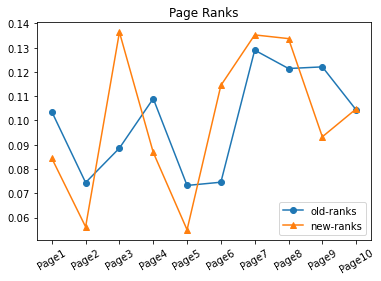

In [82]:
plt.plot(pageranks_older, "o-", label="old-ranks")
plt.plot(pageranks_newer, "^-", label="new-ranks")
plt.legend()
plt.xticks(ticks=[i for i in range(num_pages)], labels=[f"Page{i+1}" for i in range(num_pages)], rotation=30)
# plt.xticks()
plt.title("Page Ranks")

Text(0.5, 1.0, 'Page Ranks')

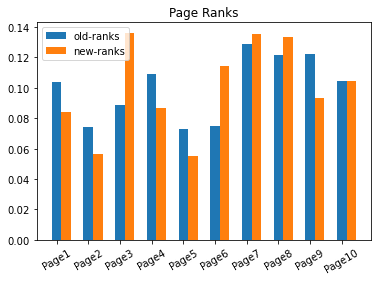

In [91]:
width = 0.3  #(default is 0.8)
plt.bar([(i) for i in range(num_pages)], pageranks_older, width=width, label="old-ranks")
plt.bar([(i+width) for i in range(num_pages)], pageranks_newer , width=width, label="new-ranks")
plt.xticks(ticks=[i for i in range(num_pages)], labels=[f"Page{i+1}" for i in range(num_pages)], rotation=30)
plt.legend()
plt.title("Page Ranks")